### ML Project (Credit card Fraud)

## Build a model to detect credit card fraud
1.	Perform data cleaning
2.	Deal with missing and duplicate values if present
3.	Check Whether the classes are balanced or not
4.	Check the performance of models without dealing with imbalanced classes
5.	Train the model using several classification models and find the best model after under-sampling the dataset
6.	Train the model using several classification models and find the best model after over-sampling the dataset
7.	Evaluate the model using various classification evaluation metrics

### Dataset Link : https://drive.google.com/drive/folders/1TemeLlJmnrYasZ19RklpvmnXlhLDBarT?usp=share_link


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [48]:
train_set = pd.read_csv("fraudTrain.csv")
test_set = pd.read_csv("fraudTest.csv")

In [49]:
train_set.shape

(1296675, 23)

In [50]:
test_set.shape

(555719, 23)

In [51]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [52]:
train_set.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [53]:
train_set.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [54]:
train_set["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [55]:
class_ratio = train_set["is_fraud"].value_counts(normalize = True)
print('Percentage of fraudulent transactions     : ', class_ratio[1]*100)
print('Percentage of non fraudulent transactions : ', class_ratio[0]*100)

Percentage of fraudulent transactions     :  0.5788651743883394
Percentage of non fraudulent transactions :  99.42113482561166


In [56]:
from sklearn.preprocessing import MinMaxScaler           # scaling the numerical column
scaler = MinMaxScaler()
train_set[["amt","zip"]] = scaler.fit_transform(train_set[["amt","zip"]])    
test_set[["amt","zip"]] = scaler.fit_transform(test_set[["amt","zip"]]) 


In [57]:
from sklearn.preprocessing import OrdinalEncoder    # encoding the categorical column
encoder = OrdinalEncoder()
train_set[['merchant', 'category', 'gender', 'job']] = encoder.fit_transform(train_set[['merchant', 'category','gender', 'job']])
test_set[['merchant', 'category', 'gender', 'job']] = encoder.fit_transform(test_set[['merchant', 'category','gender', 'job']])

In [58]:
cols = ['merchant', 'category','amt', 'gender','zip', 'job']

In [59]:
train_set[cols]

,merchant,category,amt,gender,zip,job
0,514.0,8.0,0.000137,0.0,0.278069,370.0
1,241.0,4.0,0.003670,0.0,0.993677,428.0
2,390.0,0.0,0.007569,1.0,0.832217,307.0
3,360.0,2.0,0.001520,1.0,0.592483,328.0
4,297.0,9.0,0.001415,1.0,0.235227,116.0
...,...,...,...,...,...,...
1296670,499.0,0.0,0.000503,1.0,0.847269,215.0
1296671,2.0,1.0,0.001751,1.0,0.208402,360.0
1296672,599.0,1.0,0.003625,1.0,0.883706,308.0
1296673,509.0,1.0,0.002553,1.0,0.573443,485.0


In [60]:
x_train = train_set[cols]
y_train = train_set[["is_fraud"]]

print('Data Shape   : ', x_train.shape)
print('Labels Shape : ', y_train.shape)

Data Shape   :  (1296675, 6)
Labels Shape :  (1296675, 1)


In [61]:
x_test = test_set[cols]
y_test = test_set[["is_fraud"]]

print('Data Shape   : ', x_test.shape)
print('Labels Shape : ', y_test.shape)

Data Shape   :  (555719, 6)
Labels Shape :  (555719, 1)


## Without Resampling

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [63]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ',accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ',accuracy_score(y_test, pred_test))

Training Accuracy :  0.9942113482561166
Testing  Accuracy :  0.9961401355721147


In [64]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.0
Testing  Set f1 score :  0.0
Test set precision :  0.0
Test set recall    :  0.0


In [65]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


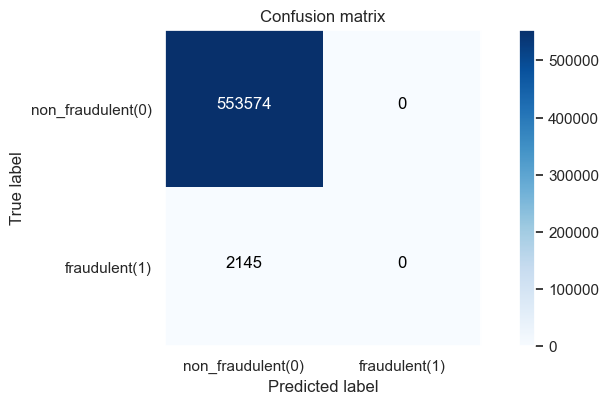

In [66]:
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

In [67]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 6)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [68]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.9966907667688512
Testing  Accuracy :  0.9921039230258458


In [69]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

Training Set f1 score :  0.6871308786000729
Testing  Set f1 score :  0.2830065359477124


In [70]:
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Test set precision :  0.21786163522012578
Test set recall    :  0.4037296037296037


In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, max_depth = 5)
classifier.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=50)

In [72]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Accuracy :  0.9942429675901826
Testing  Accuracy :  0.9961365366309232
Training Set f1 score :  0.011127301629354882
Testing  Set f1 score :  0.0
Test set precision :  0.0
Test set recall    :  0.0


Confusion matrix, without normalization


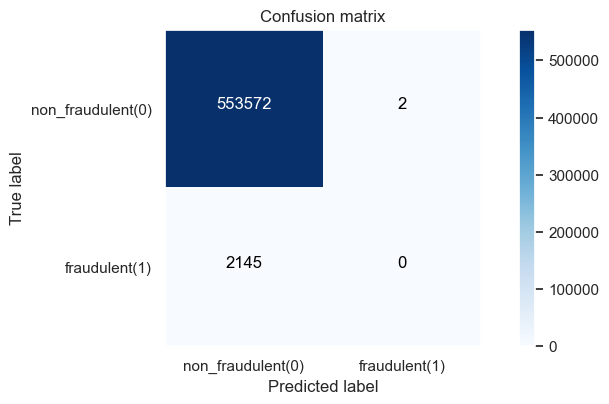

In [73]:
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (8,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

# ===============================================
## With Resampling

### 1. Undersampling

In [74]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
x_sampled, y_sampled = nm_sampler.fit_resample(x_train, y_train)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (15012, 6)
Labels :  (15012, 1)


In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.3, random_state = 10)

print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (10508, 6)
Training Labels Shape :  (10508, 1)
Testing Data Shape    :  (4504, 6)
Testing Labels Shape  :  (4504, 1)


In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [77]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.7515226494099734
Testing  Accuracy :  0.7557726465364121


In [78]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.7438940657184894
Testing  Set f1 score :  0.7468936953520479

Test set precision :  0.7713878326996197
Test set recall    :  0.723907225691347


In [79]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, max_depth = 5)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [80]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

print()
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))
print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Accuracy :  0.926627331556909
Testing  Accuracy :  0.9311722912966253

Training Set f1 score :  0.9235801367826346
Testing  Set f1 score :  0.9278398510242085

Test set precision :  0.9703018500486855
Test set recall    :  0.8889384478144514


### 2. Oversampling

In [81]:
train_set['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [82]:
x_train = train_set[cols]
y_train = train_set[["is_fraud"]]

print('Data Shape   : ', x_train.shape)
print('Labels Shape : ', y_train.shape)

Data Shape   :  (1296675, 6)
Labels Shape :  (1296675, 1)


In [83]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE()
x_sampled, y_sampled = smote_sampler.fit_resample(x_train,y_train)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (2578338, 6)
Labels :  (2578338, 1)


In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.3, random_state = 10)

print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (1804836, 6)
Training Labels Shape :  (1804836, 1)
Testing Data Shape    :  (773502, 6)
Testing Labels Shape  :  (773502, 1)


In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [86]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.5612775897643886
Testing  Accuracy :  0.5624303492427944


In [87]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.5538563477637656
Testing  Set f1 score :  0.5546243478146444

Test set precision :  0.5650767943712729
Test set recall    :  0.5445515644662416


In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, max_depth = 5)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [89]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

print()
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Accuracy :  0.9341303032519298
Testing  Accuracy :  0.9342768344490383

Training Set f1 score :  0.931604872643675
Testing  Set f1 score :  0.9318093715334272

Test set precision :  0.968832284553934
Test set recall    :  0.8975118927341273
